In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.readwrite import json_graph
from scipy import stats

In [2]:
filename = 'data/weighted_dbpedia.json'

with open(filename) as f:
    DBpedia = json.load(f) # DBpedia is a dictionary

In [3]:
keys = DBpedia.keys()

In [14]:
empty_companies = 0 # number of companies with no info inside

for key,item in DBpedia.items():
    if len(item)>0:
        for key_in,item_in in item.items():
            if item_in!= 0:
                print(f"company {key}: \n list keys {item.keys()}\n nonzero key: {key_in} -> value: {item_in}\n\n")
        
    else: # len zero
        empty_companies += 1


company Job 4 You AG: 
 list keys dict_keys(['fax', 'output', 'machine', 'telephone'])
 nonzero key: output -> value: 2


company Idéative Sàrl: 
 list keys dict_keys(['audiovisual', 'output', 'source code', 'self-organization', 'user interface', 'telecommuting'])
 nonzero key: output -> value: 2




In [74]:
# number of companies:

num_companies = len(DBpedia)
num_companies

16669

In [75]:
def add_element_list_topic (list_topics, topic):

    if topic not in list_topics.keys():
        list_topics[topic] = 1
    else:
        list_topics[topic] = list_topics[topic] + 1

    return list_topics

In [76]:
# topics

list_topics = dict()

for key,item in DBpedia.items():
    
    if len(item)>0: # non empty company info
        
        for topic in item.keys():
            add_element_list_topic (list_topics, topic)


In [77]:
# number of topics:

num_topic = len(list_topics)
num_topic

3916

In [82]:
# sort dict:

#list_topics_sorted = {k: v for k, v in sorted(list_topics.items(), key=lambda item: item[1], reverse=True)}

In [116]:
n = 20 # first n topics (more common)

list_topics_first = {i: list_topics[i] for i in list(list_topics_sorted)[:n]}
list_topics_first

{'communication': 751,
 'transmitter': 726,
 'email': 724,
 'telephone': 497,
 'rocket engine': 375,
 'computer': 333,
 'computer science': 256,
 'cognition': 212,
 'digital data': 206,
 'creativity': 189,
 'piston': 188,
 'medication': 185,
 'database': 182,
 'laser': 172,
 'motivation': 169,
 'chlorofluorocarbon': 160,
 'software': 152,
 'magnetic field': 146,
 'customer relationship management': 140,
 'information technology': 140}

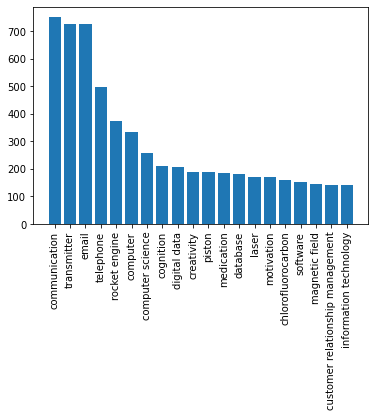

In [117]:
plt.bar(range(n), list_topics_first.values(), align="center")
plt.xticks(range(n), list(list_topics_first.keys()), rotation=90);

In [118]:
# list companies first topics

dict_company_first = dict() # dictionary companies which contains first topics

for company,item in DBpedia.items():
    
    if len(item)>0: # non empty company info

            topics_company = list(item.keys())
            
            if any(x in list_topics_first for x in topics_company):
                dict_company_first[company] = topics_company

In [119]:
print(f"{len(dict_company_first)} companies contain at least one topic of the {n} most common ones.")

4385 companies contain at least one topic of the 20 most common ones.


In [136]:
# create graph of topics:
G = nx.Graph()

G.add_nodes_from(list_topics_first.keys())

# give weight edge: number of companies which share the same topics
for a in list_topics_first.keys():
    for b in list_topics_first.keys():
        if a!=b: # not same node
            edge_weight = 0
            
            for company,topics in dict_company_first.items():
                if a in topics and b in topics:
                    edge_weight += 1
            if edge_weight>5:
                G.add_edge(a, b, weight=edge_weight)

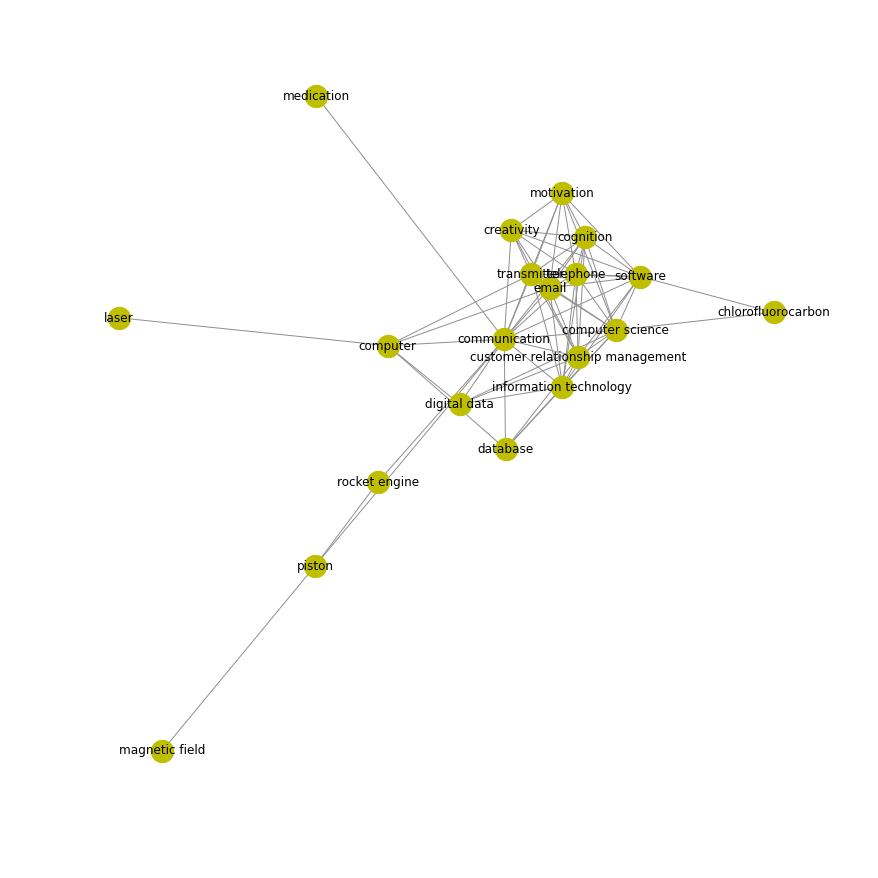

In [172]:
labels=G.nodes

pos = nx.spring_layout(G)

plt.figure(figsize=(12,12))
nx.draw(G, node_color='y', edge_color='#909090', node_size=500, with_labels=True, pos=pos)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()

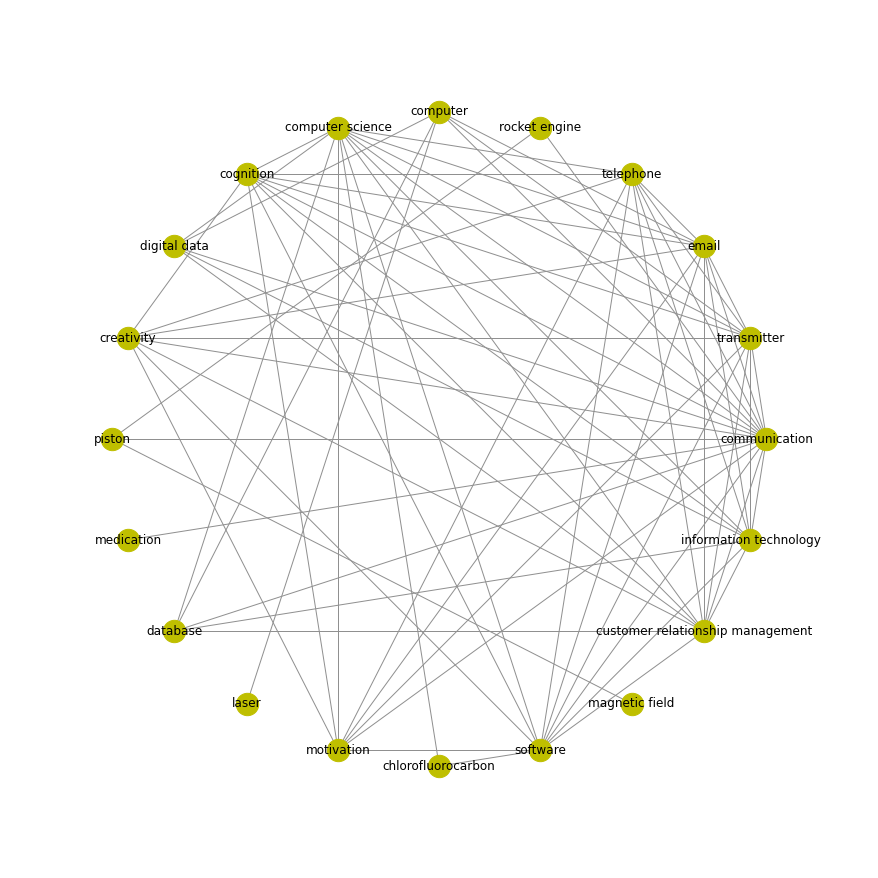

In [174]:
pos = nx.circular_layout(G)

plt.figure(3,figsize=(12,12))
nx.draw(G, node_color='y', edge_color='#909090', node_size=500, with_labels=True, pos=pos)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()